In [ ]:
# pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pyodbc
import pandas as pd
from azure.identity import DefaultAzureCredential
from azure.keyvault.secrets import SecretClient
from datetime import datetime, timedelta

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def get_secret():
    credential = DefaultAzureCredential()
    secret_client = SecretClient(vault_url="https://kvsynapsedata001.vault.azure.net", credential=credential)
    secret = secret_client.get_secret("pw-SRVSQLPoolSQL")
    return secret.value
 
 
server = 'tcp:arriba-synapseworkspace-prod-ae-001.sql.azuresynapse.net,1433'
database = 'arribasqlpool1'
username = 'SRV_SQLPool_SQL'
password = get_secret()  
 
otheropts = 'Encrypt=yes;TrustServerCertificate=yes;Connection Timeout=30;'
 
 
cnxn_t = pyodbc.connect('DRIVER={ODBC Driver 18 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+password+';'+otheropts)
cursor_t = cnxn_t.cursor()
 
 
 
 

##### RM tables - Claims

In [28]:
queries = {
    "rm_outcomegroup_df": "SELECT * FROM [dbo].[RMOutcomesGroupDropDownItemAlloc]",
    "rm_dropdownitem_df": "SELECT * FROM [dbo].[RMDropDownItem]",
    "rm_caseclaim_df": "SELECT * FROM [dbo].[RMCaseClaim]",
    "rm_s_df": "SELECT * FROM [dbo].[RMService]"
}

# 执行查询并存入字典
dfs = {name: pd.read_sql(query, cnxn_t) for name, query in queries.items()}

# 保存为 Parquet 文件
for name, df in dfs.items():
    parquet_filename = name.replace("_df", "") + ".parquet"
    df.to_parquet(parquet_filename, index=False)

print("所有 DataFrame 已保存为 Parquet 文件。")

/tmp/ipykernel_34860/4069492606.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfs = {name: pd.read_sql(query, cnxn_t) for name, query in queries.items()}
/tmp/ipykernel_34860/4069492606.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfs = {name: pd.read_sql(query, cnxn_t) for name, query in queries.items()}
/tmp/ipykernel_34860/4069492606.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfs = {name: pd.read_sql(query, cnxn_t) for name, query in queries.items()}
/tmp/ipykernel_34860/4069492606.py:9: UserWarning

所有 DataFrame 已保存为 Parquet 文件。


#### Case and Service Tables

In [5]:
queries = {
    "rm_cs_df": "SELECT * FROM [dbo].[RMCaseService]",
    "rm_ct_df": "SELECT * FROM [dbo].[RMCaseType]",
    "rm_ua_df": "SELECT * FROM [dbo].[RMUserAccount]",
    "rm_c_df": "SELECT * FROM [dbo].[RMCase]"
}

# 执行查询并存入字典
dfs = {name: pd.read_sql(query, cnxn_t) for name, query in queries.items()}

# 保存为 Parquet 文件
for name, df in dfs.items():
    parquet_filename = name.replace("_df", "") + ".csv"
    df.to_csv(parquet_filename, index=False)

print("所有 DataFrame 已保存为 csv 文件。")

/tmp/ipykernel_28584/3985591629.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfs = {name: pd.read_sql(query, cnxn_t) for name, query in queries.items()}
/tmp/ipykernel_28584/3985591629.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfs = {name: pd.read_sql(query, cnxn_t) for name, query in queries.items()}
/tmp/ipykernel_28584/3985591629.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfs = {name: pd.read_sql(query, cnxn_t) for name, query in queries.items()}
/tmp/ipykernel_28584/3985591629.py:9: UserWarning

所有 DataFrame 已保存为 csv 文件。


In [16]:
queries = {
    "rm_outcomemapping_df": "SELECT * FROM [vinci].[outcome_mapping]"
}

# 执行查询并存入字典
dfs = {name: pd.read_sql(query, cnxn_t) for name, query in queries.items()}

# 保存为 csv 文件
for name, df in dfs.items():
    parquet_filename = name.replace("_df", "") + ".csv"
    df.to_csv(parquet_filename, index=False)

print("所有 DataFrame 已保存为 csv 文件。")

/tmp/ipykernel_76501/3421273886.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfs = {name: pd.read_sql(query, cnxn_t) for name, query in queries.items()}


所有 DataFrame 已保存为 csv 文件。


#### CaseBill table treated seperately

In [4]:
queries = {
    "rm_cb_df": "SELECT * FROM [dbo].[RMCaseBill] WHERE BillDate >= '2024-07-01'"
}

# 执行查询并存入字典
dfs = {name: pd.read_sql(query, cnxn_t) for name, query in queries.items()}

# 保存为 Parquet 文件
for name, df in dfs.items():
    parquet_filename = name.replace("_df", "") + ".parquet"
    df.to_parquet(parquet_filename, index=False)

print("所有 DataFrame 已保存为 Parquet 文件。")

/tmp/ipykernel_34860/3024911133.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfs = {name: pd.read_sql(query, cnxn_t) for name, query in queries.items()}


所有 DataFrame 已保存为 Parquet 文件。


#### Create DFs

In [5]:
# 读取 parquet 文件
rm_outcomegroup_df = pd.read_parquet("rm_outcomegroup.parquet")
rm_dropdownitem_df = pd.read_parquet("rm_dropdownitem.parquet")
rm_caseclaim_df = pd.read_parquet("rm_caseclaim.parquet")
# df_s = pd.read_parquet("rm_s.parquet")


In [6]:
df_cs = pd.read_csv("rm_cs.csv")
df_ct = pd.read_csv("rm_ct.csv")
df_ua = pd.read_csv("rm_ua.csv")
df_c = pd.read_csv("rm_c.csv")
# df_cb = pd.read_parquet("rm_cb.parquet")

/tmp/ipykernel_55166/418659171.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cs = pd.read_csv("rm_cs.csv")
/tmp/ipykernel_55166/418659171.py:4: DtypeWarning: Columns (29,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df_c = pd.read_csv("rm_c.csv")


In [7]:
rm_outcomemapping_df = pd.read_csv("rm_outcomemapping.csv")

#### RTW Outcome

In [8]:
# 构建 Outcomes：去重
outcomes_df = rm_outcomegroup_df[['DropDownItemId', 'IsRTW', 'IsNotRTW']].drop_duplicates()

# 构建 MappedOutcomes：INNER JOIN + 过滤条件
mapped_outcomes_df = (
    rm_dropdownitem_df
    .merge(outcomes_df, left_on='Id', right_on='DropDownItemId', how='inner')
    .query("TypeId == 3 and IsActive == 1")
    .rename(columns={'Id': 'MappedOutcomeId', 'Name': 'StatusCodeClosure'})
)

# 构建 ClosureStatus：LEFT JOIN + CASE WHEN 逻辑
closure_status_df = (
    rm_caseclaim_df
    .merge(mapped_outcomes_df, left_on='StatusCodeAtClosureId', right_on='MappedOutcomeId', how='left')
)

closure_status_df['ClosureStatus'] = closure_status_df.apply(
    lambda row: row['StatusCodeClosure'] if pd.notnull(row['StatusCodeClosure']) else row['StatusCodeAtClosure'],
    axis=1
)

# 最终结果
closure_status_df = closure_status_df[['CaseId', 'ClosureStatus', 'IsRTW']]

In [9]:
closure_status_df

,CaseId,ClosureStatus,IsRTW
0,569208,,NaN
1,519829,,NaN
2,536038,01 - Working Same Employer - Full Work Capacit...,NaN
3,519979,Working Same Employer – Same or more pay,NaN
4,488053,Not Working - No incapacity,NaN
...,...,...,...
85618,546385,01 - Working Same Employer - Full Work Capacit...,True
85619,546386,Working - Full Time,True
85620,546387,08 - Not Working - Current Work Capacity/Job S...,False
85621,546388,02. Working With No Income Maintenance - Pre-I...,True


In [10]:
closure_status_cleaned_df = closure_status_df.drop_duplicates()

In [11]:
closure_status_cleaned_df['IsRTW'].value_counts(dropna=False)

NaN      68869
True     13857
False     2897
Name: IsRTW, dtype: int64

In [12]:
closure_status_cleaned_df

,CaseId,ClosureStatus,IsRTW
0,569208,,NaN
1,519829,,NaN
2,536038,01 - Working Same Employer - Full Work Capacit...,NaN
3,519979,Working Same Employer – Same or more pay,NaN
4,488053,Not Working - No incapacity,NaN
...,...,...,...
85618,546385,01 - Working Same Employer - Full Work Capacit...,True
85619,546386,Working - Full Time,True
85620,546387,08 - Not Working - Current Work Capacity/Job S...,False
85621,546388,02. Working With No Income Maintenance - Pre-I...,True


In [13]:
# 检查 CaseId 是否有重复项
duplicate_counts = closure_status_cleaned_df['CaseId'].value_counts()
duplicates = duplicate_counts[duplicate_counts > 1]

if duplicates.empty:
    # 没有重复项，设置为 index
    closure_status_cleaned_df.set_index('CaseId', inplace=True)
    print("CaseId 没有重复项，已设置为 index。")
else:
    # 有重复项，列出重复的 CaseId 和次数
    print("发现重复的 CaseId，及其出现次数如下：")
    print(duplicates)


发现重复的 CaseId，及其出现次数如下：
546774    2
565062    2
568386    2
563814    2
530041    2
553232    2
560906    2
Name: CaseId, dtype: int64


In [14]:
duplicates

546774    2
565062    2
568386    2
563814    2
530041    2
553232    2
560906    2
Name: CaseId, dtype: int64

In [15]:
# 找出重复的 CaseId（完全重复的值不算，只看 CaseId 是否重复）
duplicated_caseid_df = closure_status_cleaned_df[closure_status_cleaned_df.duplicated(subset='CaseId', keep=False)]

In [16]:
duplicated_caseid_df

,CaseId,ClosureStatus,IsRTW
2256,560906,Not Working - Reduced Capacity,True
2257,560906,Not Working - Reduced Capacity,False
34318,553232,Not Working - Reduced Capacity,True
34319,553232,Not Working - Reduced Capacity,False
55900,530041,Not Working - Pre-Injury Capacity,True
55901,530041,Not Working - Pre-Injury Capacity,False
64686,565062,Not Working - Reduced Capacity,True
64687,565062,Not Working - Reduced Capacity,False
77025,568386,"RTW - Same Employer, Original Duties",True
77026,568386,"RTW - Same Employer, Original Duties",False


#### Calculate the max dateclosed of services based on service_priority, include CaseClass

In [17]:
# 合并数据
df = df_cs.merge(df_ct[['Id', 'Name']], left_on='CaseTypeId', right_on='Id', suffixes=('', '_CaseType'))
df = df.merge(df_ua[['Id', 'FirstName', 'LastName']], left_on='AssignedToId', right_on='Id', suffixes=('', '_User'))

# 创建 FullName 字段
df['FullName'] = df['FirstName'] + ' ' + df['LastName']

# 定义服务类型优先级
def service_priority(name):
    if pd.isna(name):
        return 99
    name_lower = name.lower()
    if 'new employer' in name_lower or 'same employer' in name_lower:
        return 1
    elif 'assessment' in name_lower:
        return 2
    else:
        return 3

df['priority'] = df['Name'].apply(service_priority)

# 排序并添加 row number
df_sorted = df.sort_values(by=['CaseId', 'priority', 'DateClosed'], ascending=[True, True, False])
df_sorted['rn'] = df_sorted.groupby('CaseId').cumcount() + 1

# 过滤出每个 CaseId 的第一行
max_service_case_type = df_sorted[df_sorted['rn'] == 1][[
    'DateClosed',
    'Name',  # ServiceCaseType
    'Id',
    'CaseId',
    'ServiceId',
    'DateRequested',  # ServiceReferralDate
    'FullName'
]].rename(columns={
    'Name': 'ServiceCaseType',
    'DateRequested': 'ServiceReferralDate',
    'Id': 'cs_Id'
})

# 输出结果
max_service_case_type.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 35694 entries, 4151 to 60440
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DateClosed           31725 non-null  object
 1   ServiceCaseType      35694 non-null  object
 2   cs_Id                35694 non-null  int64 
 3   CaseId               35694 non-null  int64 
 4   ServiceId            35694 non-null  int64 
 5   ServiceReferralDate  35694 non-null  object
 6   FullName             35686 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.2+ MB


In [18]:
def check_and_set_index(df, column_name):
    # 检查重复值
    duplicates = df[column_name][df[column_name].duplicated(keep=False)]
    
    if duplicates.empty:
        df = df.set_index(column_name)
        print(f"No duplicates found. '{column_name}' has been set as index.")
        return df
    else:
        dup_counts = df[column_name].value_counts()
        dup_filtered = dup_counts[dup_counts > 1]
        print(f"Found duplicates in '{column_name}':")
        print(dup_filtered)
        return df  # 保持原样，不设置 index

# 使用方法
max_service_case_type = check_and_set_index(max_service_case_type, 'CaseId')

No duplicates found. 'CaseId' has been set as index.


In [19]:
max_service_case_type

,DateClosed,ServiceCaseType,cs_Id,ServiceId,ServiceReferralDate,FullName
CaseId,,,,,,
484369,2023-09-03 22:33:36.347,DVA - New Employer,679154,43284,2016-08-02 00:00:00.000,Kayley Ng
484378,2024-04-15 00:00:00.000,DVA - New Employer,679168,43284,2017-04-05 00:00:00.000,Tyler Winn
484384,2023-05-31 11:33:30.483,DVA - New Employer,679174,43284,2018-01-11 00:00:00.000,Sarah Reynolds
484386,2024-04-22 00:00:00.000,DVA - New Employer,679178,43284,2018-07-25 00:00:00.000,Alexia Armiento
484389,2023-11-06 00:00:00.000,DVA - New Employer,679184,43284,2018-09-21 00:00:00.000,Wan Ting Huang
...,...,...,...,...,...,...
570016,NaN,CGU - Workers Comp - Assessment,814653,51132,2025-08-12 00:00:00.000,Lauren Foletta
570018,NaN,CGU - Workers Comp - Assessment,814657,51132,2025-08-12 00:00:00.000,Rachel Yovich
570020,NaN,DECYP Wellbeing,814656,54638,2025-08-12 00:00:00.000,Melanie Leney


In [20]:
import re

keywords = [
    'assessment',
    'return to function',
    'non-vocational',
    'pre employment services',
    'workforce australia - allied health program',
    'generic',
    'employee assistance program',
    'lifetime care and support',
    'accounts',
    'dva - wasp - program',
    'rsl - lane',
    'fdc construction',
    'frdc (fisheries)'
]

pattern = '|'.join(map(re.escape, keywords))

def classify_case_type(s):
    s = str(s).lower()
    if 'new employer' in s:
        return 'NE'
    elif 'same employer' in s:
        return 'SE'
    elif re.search(pattern, s):
        return 'SS'
    else:
        return 'other'

max_service_case_type['CaseClass'] = max_service_case_type['ServiceCaseType'].apply(classify_case_type)

In [21]:
max_service_case_type

,DateClosed,ServiceCaseType,cs_Id,ServiceId,ServiceReferralDate,FullName,CaseClass
CaseId,,,,,,,
484369,2023-09-03 22:33:36.347,DVA - New Employer,679154,43284,2016-08-02 00:00:00.000,Kayley Ng,NE
484378,2024-04-15 00:00:00.000,DVA - New Employer,679168,43284,2017-04-05 00:00:00.000,Tyler Winn,NE
484384,2023-05-31 11:33:30.483,DVA - New Employer,679174,43284,2018-01-11 00:00:00.000,Sarah Reynolds,NE
484386,2024-04-22 00:00:00.000,DVA - New Employer,679178,43284,2018-07-25 00:00:00.000,Alexia Armiento,NE
484389,2023-11-06 00:00:00.000,DVA - New Employer,679184,43284,2018-09-21 00:00:00.000,Wan Ting Huang,NE
...,...,...,...,...,...,...,...
570016,NaN,CGU - Workers Comp - Assessment,814653,51132,2025-08-12 00:00:00.000,Lauren Foletta,SS
570018,NaN,CGU - Workers Comp - Assessment,814657,51132,2025-08-12 00:00:00.000,Rachel Yovich,SS
570020,NaN,DECYP Wellbeing,814656,54638,2025-08-12 00:00:00.000,Melanie Leney,other


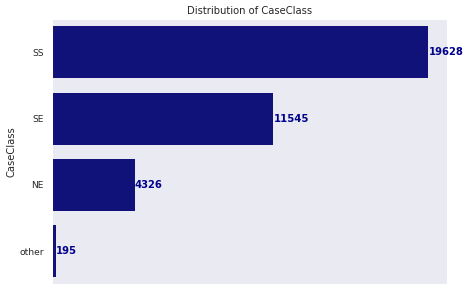

In [22]:
sns.set_theme()
sns.set_style('darkgrid')

# 统计 CaseClass 数量
case_class_counts = max_service_case_type['CaseClass'].value_counts()

# 绘图
plt.figure(figsize=(8, 5),dpi=60)
ax = sns.barplot(x=case_class_counts.values, y=case_class_counts.index, color='darkblue')

# 去掉 x 轴
ax.xaxis.set_visible(False)

# 获取 x 轴最大值，避免标签超出边界
xlim = ax.get_xlim()[1]

# 添加标签，放在 bar 外侧但不超过边界
for i, count in enumerate(case_class_counts.values):
    label_x = min(count + 0.5, xlim - 0.5)
    ax.text(label_x, i, str(count), color='darkblue', va='center', ha='left', fontweight='bold')

plt.ylabel('CaseClass')
plt.title('Distribution of CaseClass')
plt.tight_layout()
plt.show()



In [23]:
max_service_case_type['ServiceReferralDate'] = pd.to_datetime(max_service_case_type['ServiceReferralDate'])
max_service_case_type['FormattedDate'] = max_service_case_type['ServiceReferralDate'].dt.strftime('%b-%Y')


In [24]:
max_service_case_type

,DateClosed,ServiceCaseType,cs_Id,ServiceId,ServiceReferralDate,FullName,CaseClass,FormattedDate
CaseId,,,,,,,,
484369,2023-09-03 22:33:36.347,DVA - New Employer,679154,43284,2016-08-02,Kayley Ng,NE,Aug-2016
484378,2024-04-15 00:00:00.000,DVA - New Employer,679168,43284,2017-04-05,Tyler Winn,NE,Apr-2017
484384,2023-05-31 11:33:30.483,DVA - New Employer,679174,43284,2018-01-11,Sarah Reynolds,NE,Jan-2018
484386,2024-04-22 00:00:00.000,DVA - New Employer,679178,43284,2018-07-25,Alexia Armiento,NE,Jul-2018
484389,2023-11-06 00:00:00.000,DVA - New Employer,679184,43284,2018-09-21,Wan Ting Huang,NE,Sep-2018
...,...,...,...,...,...,...,...,...
570016,NaN,CGU - Workers Comp - Assessment,814653,51132,2025-08-12,Lauren Foletta,SS,Aug-2025
570018,NaN,CGU - Workers Comp - Assessment,814657,51132,2025-08-12,Rachel Yovich,SS,Aug-2025
570020,NaN,DECYP Wellbeing,814656,54638,2025-08-12,Melanie Leney,other,Aug-2025


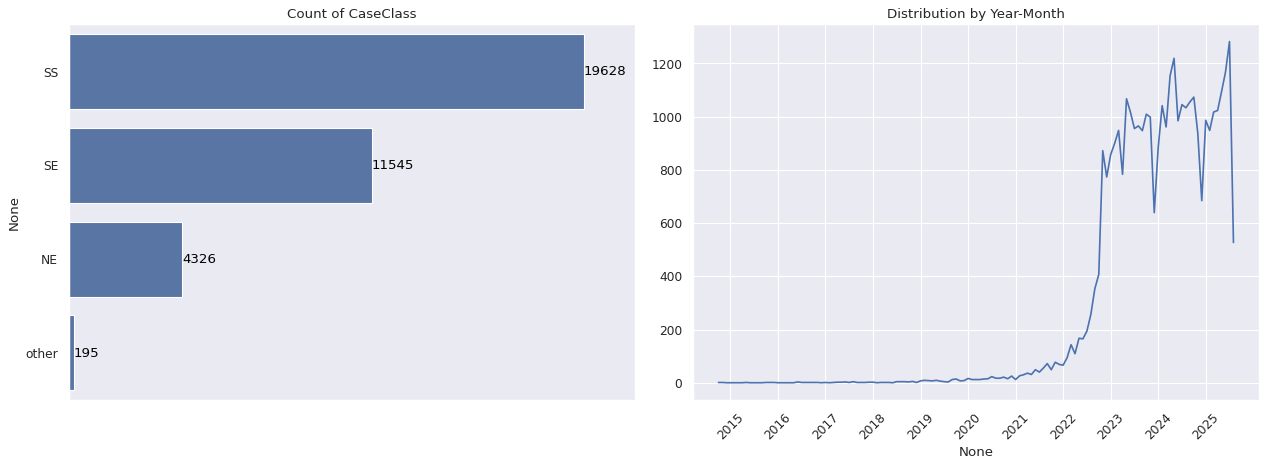

In [25]:
# 提取 YearMonth 和 Year
max_service_case_type['YearMonth'] = max_service_case_type['ServiceReferralDate'].dt.to_period('M').astype(str)
max_service_case_type['Year'] = max_service_case_type['ServiceReferralDate'].dt.year

# 左图：CaseClass 横向条形图
caseclass_counts = max_service_case_type['CaseClass'].value_counts().sort_values(ascending=False)
fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=80)
sns.barplot(y=caseclass_counts.index, x=caseclass_counts.values, ax=axes[0])
axes[0].set_title('Count of CaseClass')
axes[0].axes.get_xaxis().set_visible(False)
max_value = max(caseclass_counts.values)
axes[0].set_xlim(0, max_value * 1.1)
for i, value in enumerate(caseclass_counts.values):
    axes[0].text(value + max_value * 0.0001, i, str(value), va='center', ha='left', color='black')

# 构造完整的 YearMonth 范围
min_date = max_service_case_type['ServiceReferralDate'].min()
max_date = max_service_case_type['ServiceReferralDate'].max()
all_months = pd.period_range(start=min_date.to_period('M'), end=max_date.to_period('M'), freq='M')
all_months_str = all_months.astype(str)

# YearMonth 分布统计并补齐缺失月份
yearmonth_counts = max_service_case_type['YearMonth'].value_counts()
yearmonth_counts = yearmonth_counts.reindex(all_months_str, fill_value=0)

# 右图：YearMonth 分布图
sns.lineplot(x=yearmonth_counts.index, y=yearmonth_counts.values, ax=axes[1])
axes[1].set_title('Distribution by Year-Month')

# 设置 x 轴每年一月显示年份
xticks = [i for i, ym in enumerate(yearmonth_counts.index) if ym.endswith('-01')]
xtick_labels = [yearmonth_counts.index[i][:4] for i in xticks]
axes[1].set_xticks(xticks)
axes[1].set_xticklabels(xtick_labels, rotation=45)

plt.tight_layout()
plt.show()
